## Import data

In [1]:
import pandas as pd

dataset = pd.read_csv('Cancer.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [2]:
dataset.head()

,0.063915,0.033242,0.018484,0.0086177,0.035629,0.037925,0.028865,0.061731,0.0631,0.024787,0.034473,0.033539,0.01043,0.018585,0.051385,0.045839,0.02908,0.079736,0.089912,0.06538,0.048052,0.017063,0.016695,0.013443,0.016502,0.061453,0.085336,0.069497,0.063938,0.045307,0.065024,0.066515,0.023628,0.016413,0.030908,0.033744,0.067682,0.051679,0.03937,0.041441,...,0.024769,0.037324,0.036717,0.037926,0.025362,0.032274,0.037402,0.021708,0.042619,0.038659,0.011192,0.026882,0.031891,0.016852,0.019141,0.027912,0.027902,0.033542,0.02573,0.01405,0.024751,0.023412,0.026159,0.031684,0.051812,0.039444,0.029653,0.016242,0.03425,0.035119,0.021515,0.017385,0.018564,0.010027,0.012907,0.023405,0.038839,0.038151,0.032085,C
0,0.025409,0.051085,0.056305,0.021738,0.027410,0.014914,0.022455,0.023957,0.060527,0.047382,0.032455,0.034368,0.042081,0.033586,0.030505,0.050972,0.053383,0.035885,0.066366,0.055495,0.076589,0.080017,0.075061,0.004252,0.017495,0.038238,0.073359,0.073178,0.062055,0.086377,0.101340,0.052906,0.039469,0.042734,0.040194,0.058838,0.058603,0.057568,0.061537,0.053980,...,0.016628,0.031519,0.047875,0.025434,0.034070,0.025602,0.037460,0.033488,0.030642,0.025165,0.044019,0.042104,0.035007,0.035176,0.042768,0.058703,0.032367,0.025872,0.026980,0.058895,0.039463,0.034146,0.021493,0.038700,0.020309,0.016217,0.025837,0.015283,0.045615,0.050841,0.055033,0.080864,0.053423,0.051942,0.013187,0.028573,0.020427,0.023261,0.019975,C
1,0.025536,0.036123,0.054195,0.009735,0.027521,0.052255,0.042812,0.069087,0.069873,0.066629,0.043953,0.024141,0.010930,0.038279,0.071463,0.059207,0.030963,0.044256,0.075730,0.045168,0.075071,0.049938,0.039305,0.005463,0.002152,0.096269,0.131510,0.066757,0.049883,0.064774,0.095143,0.054669,0.052777,0.041424,0.048040,0.050780,0.066666,0.072161,0.056550,0.039086,...,0.064079,0.045542,0.014756,0.012011,0.024230,0.045105,0.057743,0.045916,0.052717,0.029586,0.032430,0.051928,0.023077,0.036005,0.035644,0.049772,0.044400,0.077083,0.036150,0.026258,0.028932,0.034548,0.051987,0.043067,0.062111,0.037874,0.037671,0.047287,0.033514,0.029078,0.033783,0.029022,0.046397,0.033288,0.041889,0.019256,-0.009447,0.021481,0.025569,C
2,0.012817,0.029652,0.079290,0.050677,0.039737,0.057713,0.044492,0.034581,0.042587,0.034147,0.027187,0.015647,0.025171,0.061664,0.032871,0.051305,0.071834,0.054755,0.049099,0.053036,0.061483,0.035359,0.026448,0.026280,0.071219,0.062114,0.029927,0.038563,0.075586,0.104780,0.091811,0.068762,0.034298,0.048845,0.073375,0.057342,0.035106,0.062046,0.048893,0.072327,...,0.029384,0.021471,0.031242,0.010720,0.038452,0.079256,0.041359,0.043127,0.048530,0.029375,0.024244,0.056262,0.044267,0.014457,0.041844,0.072468,0.046834,0.026447,0.042812,0.045295,0.025028,0.062789,0.058185,0.042317,0.057081,0.016343,0.040650,0.023925,0.068970,0.054675,0.036083,0.038598,0.048881,0.025569,0.026710,0.025122,0.047466,0.046706,0.043482,C
3,0.019846,-0.010577,-0.007504,0.019042,0.068786,0.061764,0.039036,0.020445,0.025988,0.066716,0.038738,0.024333,0.052067,0.084740,0.063564,0.042516,0.025874,0.068577,0.051353,0.066713,0.045730,0.071513,0.052216,0.053669,0.030604,0.055215,0.083480,0.034515,0.041145,0.076578,0.087774,0.049457,0.060838,0.074425,0.044697,0.050821,0.032854,0.034468,0.068844,0.080823,...,0.021398,0.020906,0.008364,0.006254,0.059083,0.056491,0.025792,0.034017,0.029784,0.035282,0.025776,0.039863,0.026833,0.063622,0.024966,0.037191,0.037282,0.033952,0.045301,0.055604,0.015818,0.054390,0.046276,0.068599,0.059881,0.039076,0.032344,0.032463,0.070598,0.063163,0.032044,0.026320,0.072016,0.070145,0.055744,0.051084,0.036683,0.043729,0.040289,C
4,0.039048,0.039355,0.001343,0.026221,0.044091,0.043953,0.039629,0.047926,0.046892,0.030589,0.015330,-0.004896,0.016667,0.024177,0.071728,0.043962,0.040467,0.024818,0.051898,0.064025,0.034018,0.028810,0.051448,0.031067,0.046406,0.076268,0.047864,0.050841,0.043432,0.054173,0.061169,0.024343,0.018815,0.048643,0.068434,0.050886,0.047532,0.042907,0.061382,0.075312,...,0.031822,0.019569,0.023791,0.015343,0.035194

## Encoding the output data

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode labels ('C' as 1, 'N' as 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Part A: PCA and Plot PC1-PC2

### Perform PCA

In [4]:
from sklearn.decomposition import PCA

# Assuming X is has shape (216, 4000)
pca = PCA(n_components=2)  # We want 2 components
X_pca = pca.fit_transform(X)

### Plot PC1-PC2

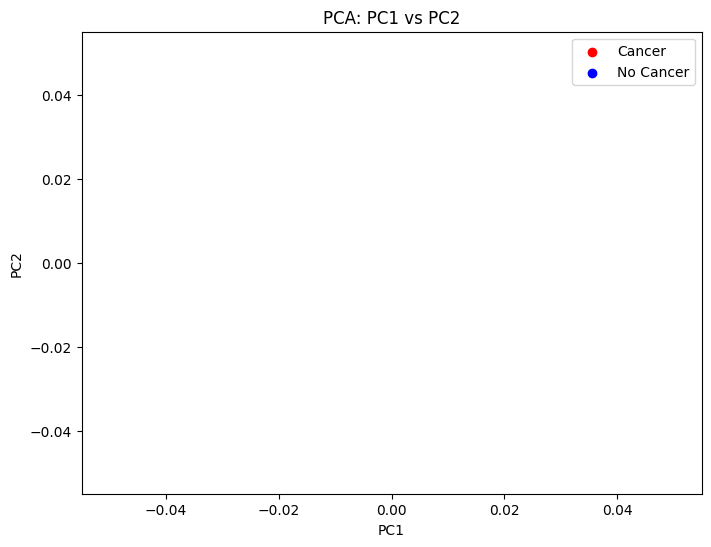

In [5]:
import matplotlib.pyplot as plt

# Create a DataFrame with the first two principal components and labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Plot PC1-PC2 for the 216 patients
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['label'] == 'C']['PC1'], pca_df[pca_df['label'] == 'C']['PC2'], label='Cancer', color='r')
plt.scatter(pca_df[pca_df['label'] == 'N']['PC1'], pca_df[pca_df['label'] == 'N']['PC2'], label='No Cancer', color='b')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA: PC1 vs PC2')
plt.show()

## Part B: Calculate Information Preservation

In [6]:
pca = PCA(n_components=10)
X_pca_10 = pca.fit_transform(X)

In [7]:
explained_variance_ratio = pca.explained_variance_ratio_
info_preserved = sum(explained_variance_ratio[:10]) * 100
print(f'Percentage of information preserved: {info_preserved:.2f}%')

Percentage of information preserved: 97.22%


## Part C: Build an ANN Classifier

In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_df[['PC1', 'PC2']], pca_df['label'], test_size=0.2, random_state=42)

# Build a simple ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, (y_train == 'C').astype(int), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, (y_test == 'C').astype(int))
print(f"Model Accuracy: {accuracy:.2f}")

Epoch 1/10
6/6 [==============================] - 1s 4ms/step - loss: 0.1124 - accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0693 - accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 0.0483 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0203 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 0s 6ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - accuracy: 1.0000
Model Accuracy: 1.00
